In [56]:
import os
import numpy as np
from dicompylercore.dicomparser import DicomParser
import pickle

year = 2015
series = "AX2"

def preprocess(name, series):

    z_RCS_to_pixel = {}
    struc = {}

    image_count = 0
    
    for root, dirs, filenames in os.walk("E:\\Brainmets\\"+str(year)+"metastases\\"+name+"\\"+name+"_"+series):
        for i, w in enumerate(filenames):
            if w[0:3] == "IMG":
                dp = DicomParser(root+'\\'+w)
                if dp.ds.SOPClassUID.name == "MR Image Storage":
                    image_count += 1
                    if list(dp.ds.ImageOrientationPatient) != [1, 0, 0, 0, 1, 0]:
                        print("error")
                    if list(dp.ds.PixelSpacing) != [0.5078, 0.5078]:
                        print("error")
                    if dp.ds.ImagePositionPatient[0] != -129.746:
                        print("error")
                    if dp.ds.ImagePositionPatient[1] != -129.746:
                        print("error")
                    if image_count == 1:
                        pixel_data = dp.ds.pixel_array.reshape(512,512,1)
                    else:
                        pixel_data = np.concatenate((pixel_data, dp.ds.pixel_array.reshape(512,512,1)), axis=2)
                    z_RCS_to_pixel[(dp.ds.ImagePositionPatient[2])] = w
                else:
                    print("error")
            if w[0:4] == "RTSS":
                dp = DicomParser(root+'\\'+w)
                dp.ds.SOPClassUID.name == "RT Structure Set Storage"
                struc_info = dp.GetStructures()
                for a in struc_info:
                    if 'Skull' not in struc_info[a]['name']:
                        struc[struc_info[a]['name']] = dp.GetStructureCoordinates(a)

        #############################################################################                
                        
        tumor_points = {}

        for s in struc:
            points = []
            for key, value in struc[s].items():
                for layer in value:
                    for point in layer['data']:
                        points.append(point)

            for i, [x_, y_, z_] in enumerate(points):
                if i == 0:
                    x_max = x_
                    x_min = x_
                    y_max = y_
                    y_min = y_
                    z_max = z_
                    z_min = z_
                if x_>x_max: x_max=x_;
                if x_<x_min: x_min=x_;
                if y_>y_max: y_max=y_;
                if y_<y_min: y_min=y_;
                if z_>z_max: z_max=z_;
                if z_<z_min: z_min=z_;

            y_p_min = round((x_min + 129.746)/0.5078)
            y_p_max = round((x_max + 129.746)/0.5078)
            x_p_min = round((y_min + 129.746)/0.5078)
            x_p_max = round((y_max + 129.746)/0.5078)
            z_p_max = int(z_RCS_to_pixel[round(z_min)][-6:-4])
            z_p_min = int(z_RCS_to_pixel[round(z_max)][-6:-4])

            tumor_points[s] = pixel_data[x_p_min:x_p_max+1, y_p_min:y_p_max+1, z_p_min:z_p_max+1]
            
            #############################################################################
            
        for n, tumor in tumor_points.items():
            with open('X_pickle_1211\\tumor_'+str(year)+'\\'+name+"_"+series+"_"+n, 'wb') as handle:
                pickle.dump(tumor, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print(name+"_"+series+"_"+n+" ... OK")

In [57]:
for root, dirs, filenames in os.walk("E:\\Brainmets\\"+str(year)+"metastases"):
    for i,w in enumerate(dirs):
        name = w
        print(name)
        series = series
        try:
            preprocess(name, series)
        except:
            print("ERROR "+name)

11993945_20150212
11993945_20150212_AX2_tv6 ... OK
11993945_20150212_AX2_tv4 ... OK
11993945_20150212_AX2_tv3 ... OK
11993945_20150212_AX2_tv2 ... OK
11993945_20150212_AX2_tv1 ... OK
13906542_20150611
13906542_20150611_AX2_TV7 Lt Occipial ... OK
13906542_20150611_AX2_TV6 Lt Occipital ... OK
13906542_20150611_AX2_TV5 Lt Occipital ... OK
13906542_20150611_AX2_TV4 Rt Frontal ... OK
13906542_20150611_AX2_TV3 Lt Thalamus ... OK
13906542_20150611_AX2_TV2 Lt Insula ... OK
13906542_20150611_AX2_TV1 vernis ... OK
14114502_20151218
14114502_20151218_AX2_tv ... OK
14707552_20150703
14707552_20150703_AX2_TV1 Lt Occipital ... OK
15574513_20151109
15574513_20151109_AX2_TV6 Lt Parietal ... OK
15574513_20151109_AX2_TV5 cerebellum ... OK
15574513_20151109_AX2_TV4 Frontal Meningioma ... OK
15574513_20151109_AX2_TV3 Lt occipital ... OK
15574513_20151109_AX2_TV2 Rt thalamus ... OK
15574513_20151109_AX2_TV1 Lt Thalamus ... OK
16520835_20150804
20081258_20150204
21284957_20150108
21509682_20150525
21509682_

In [37]:
12391876_20131219
15128344_20131120
36528571_20131030
37328942_20131210
40658331_20131106
5531077_20131022
for root, dirs, filenames in os.walk("E:\\Brainmets\\2013metastases\\12391876_20131219\\12391876_20131219_AX1"):
    for i, w in enumerate(filenames):
        z_RCS_to_pixel = {}
        struc = {}

        image_count = 0
        if w[0:3] == "IMG":
            print("dp.ds.SOPClassUID.name")
            dp = DicomParser(root+'\\'+w)
            if dp.ds.SOPClassUID.name == "MR Image Storage":
                image_count += 1
                if list(dp.ds.ImageOrientationPatient) != [1, 0, 0, 0, 1, 0]:
                    print("error")
                if list(dp.ds.PixelSpacing) != [0.5078, 0.5078]:
                    print("error")
                if dp.ds.ImagePositionPatient[0] != -129.746:
                    print("error")
                if dp.ds.ImagePositionPatient[1] != -129.746:
                    print("error")
                if image_count == 1:
                    pixel_data = dp.ds.pixel_array.reshape(512,512,1)
                else:
                    pixel_data = np.concatenate((pixel_data, dp.ds.pixel_array.reshape(512,512,1)), axis=2)
                z_RCS_to_pixel[(dp.ds.ImagePositionPatient[2])] = w
            else:
                print("error")
                break
                
print(image_count)

0


In [17]:
#print(pixel_data.shape)
#print(struc)
#print(z_RCS_to_pixel)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pixel_data[:, :, 28])


NameError: name 'pixel_data' is not defined

(13, 13, 3)
5


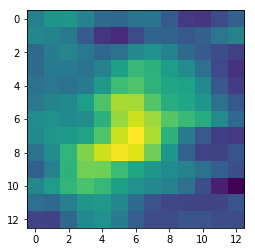

In [171]:
print(tumor_points['R_Frontal_antmed'].shape)
print(len(tumor_points))

plt.imshow(tumor_points['R_Frontal_antmed'][:,:,0])